In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
file = pd.read_csv('file:///Users/alfredthomas/Downloads/supermarket_sales - Sheet1.csv')

In [6]:
file.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
#NO missing values in the dataset we can proceed to verify duplicates value 

file.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

<Figure size 1500x800 with 0 Axes>

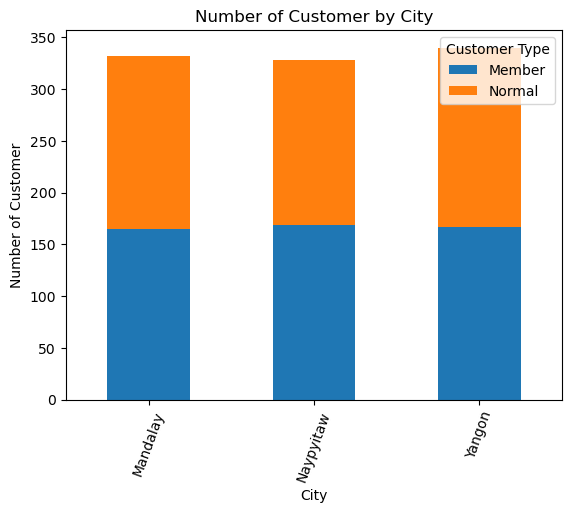

In [35]:
#NO duplicated value 

total_customer_by_City = file.pivot_table(index='City', columns='Customer type', values='Invoice ID', aggfunc='count')
plt.figure(figsize=(15, 8))
total_customer_by_City.plot.bar(stacked=True)
plt.title('Number of Customer by City')
plt.xlabel('City')
plt.ylabel('Number of Customer')
plt.legend(title='Customer Type')
plt.xticks(rotation=70)
plt.show()


In [36]:
#1st oservation : The number of customer in all the branch are slightly the same and Member type as well . let now see the comparions with the sex


<Figure size 1500x800 with 0 Axes>

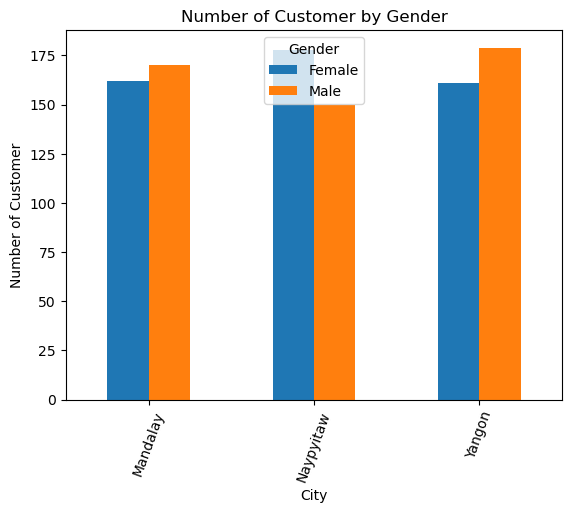

In [47]:
total_customer_by_gender = file.pivot_table(index='City', columns='Gender', values='Invoice ID', aggfunc='count')
plt.figure(figsize=(15, 8))
total_customer_by_gender .plot.bar()
plt.title('Number of Customer by Gender')
plt.xlabel('City')
plt.ylabel('Number of Customer')
plt.legend(title='Gender')
plt.xticks(rotation=70)
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Electronic accessories')])

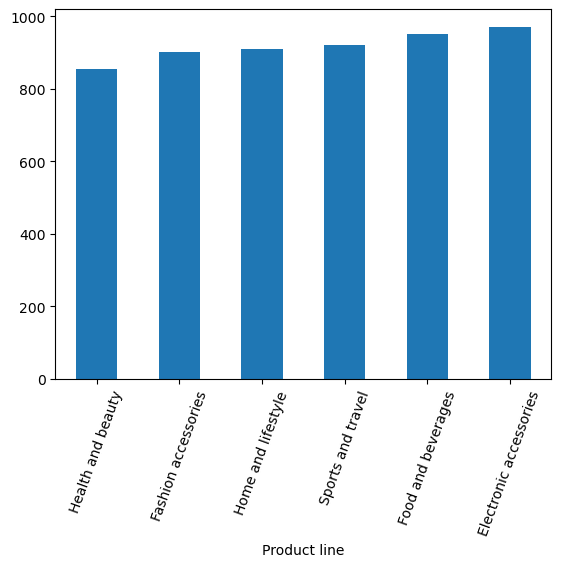

In [23]:
#number of quantiy product sold 
total_product_sold = file.groupby('Product line')['Quantity'].sum().sort_values()
total_product_sold.plot.bar()
plt.xticks(rotation=70)

<Figure size 2000x800 with 0 Axes>

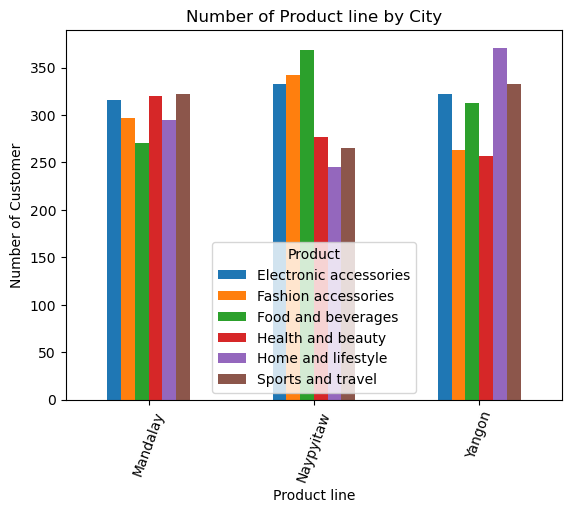

In [54]:
total_product_by_City = file.pivot_table(index='City', columns='Product line', values='Quantity', aggfunc='sum')
plt.figure(figsize=(20, 8))
total_product_by_City .plot.bar()
plt.title('Number of Product line by City')
plt.xlabel('Product line')
plt.ylabel('Number of Customer')
plt.legend(title='Product')
plt.xticks(rotation=70)
plt.show()

<Figure size 1500x800 with 0 Axes>

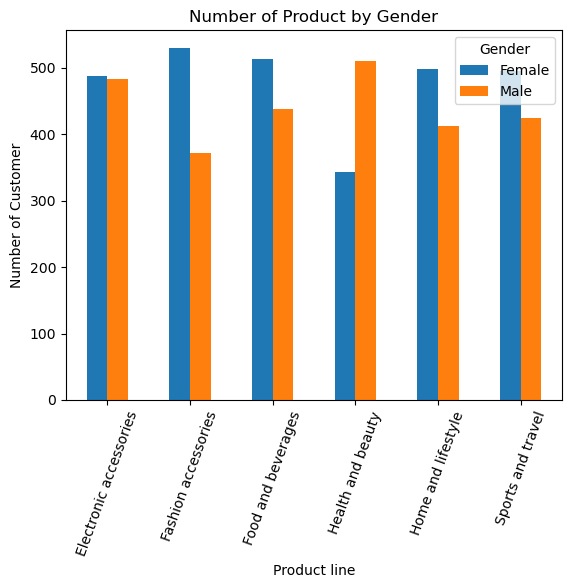

In [52]:
total_product_by_gender = file.pivot_table(index='Product line', columns='Gender', values='Quantity', aggfunc='sum')
plt.figure(figsize=(15, 8))
total_product_by_gender .plot.bar()
plt.title('Number of Product by Gender')
plt.xlabel('Product line')
plt.ylabel('Number of Customer')
plt.legend(title='Gender')
plt.xticks(rotation=70)
plt.show()

<Figure size 2000x800 with 0 Axes>

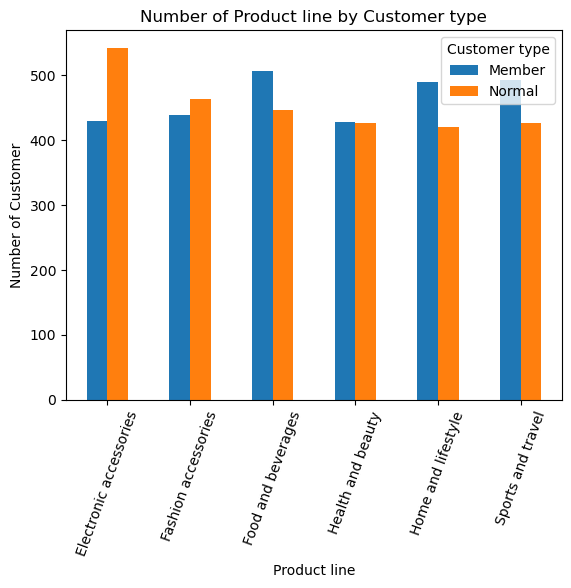

In [51]:
total_product_by_customer_type = file.pivot_table(index='Product line', columns='Customer type', values='Quantity', aggfunc='sum')
plt.figure(figsize=(20, 8))
total_product_by_customer_type .plot.bar()
plt.title('Number of Product line by Customer type')
plt.xlabel('Product line')
plt.ylabel('Number of Customer')
plt.legend(title='Customer type')
plt.xticks(rotation=70)
plt.show()

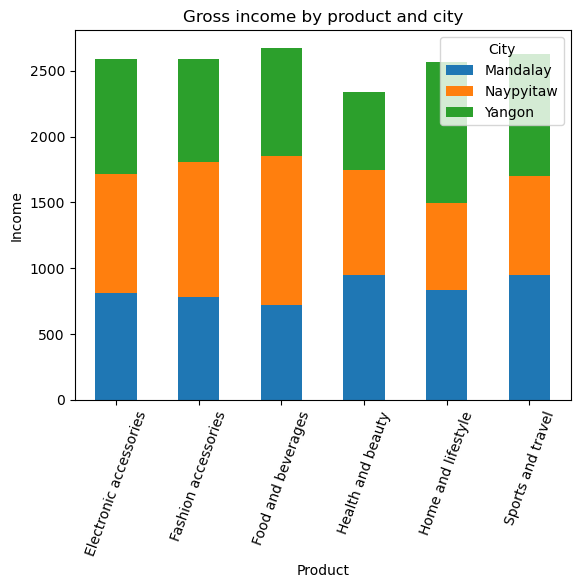

In [34]:
#product by Gross income 


most_income_product = file.groupby(['Product line','City'])['gross income'].sum().unstack()
most_income_product .plot(kind='bar' , stacked=True)
plt.title('Gross income by product and city')
plt.xlabel('Product')
plt.ylabel('Income')
plt.legend(title='City')
plt.xticks(rotation=70)
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Credit card'), Text(1, 0, 'Cash'), Text(2, 0, 'Ewallet')])

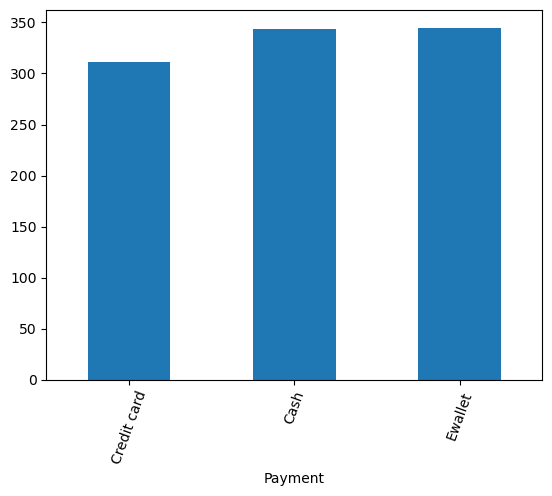

In [41]:
#most used payment method 


most_payment_method_used = file.groupby('Payment')['Invoice ID'].count().sort_values()
most_payment_method_used.plot.bar()
plt.xticks(rotation=70)

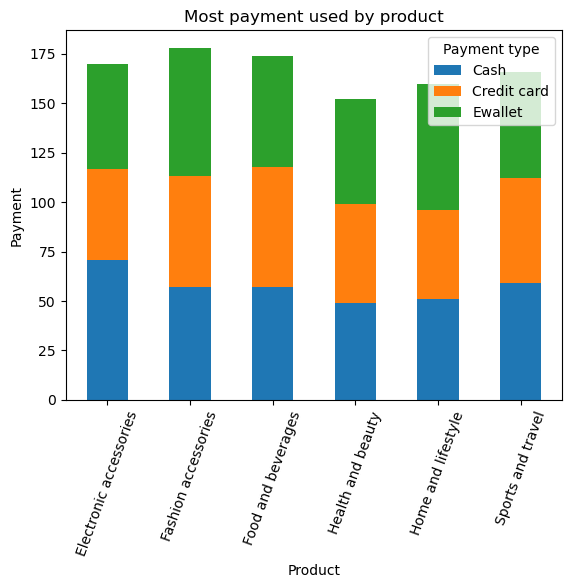

In [46]:
#Payment method by product line 

most_payment_method_by_product = file.groupby(['Product line','Payment'])['Invoice ID'].count().unstack()
most_payment_method_by_product.plot(kind='bar',stacked=True)
plt.title('Most payment used by product')
plt.xlabel('Product')
plt.ylabel('Payment')
plt.legend(title='Payment type')
plt.xticks(rotation=70)
plt.show()